In [2]:
#generic
%matplotlib inline
from __future__ import print_function

import numpy as np
import time
import tensorflow as tf
# import quandl 
import matplotlib.pyplot as plt

from yahoo_finance import Share

In [3]:
def get_data_by_key(key, data):
    data_it = iter(data)
    return_data = []
    flag = True
    for d in data_it:
        if key !="Date":
            return_data.append(float(d[key]))
        else:
            return_data.append(d[key])
        
    return np.array(return_data)

In [4]:
def get_data_by_list_fixed(name_list, start_date, end_date, data_type="Open"):
    share_list = []
    new_name_list = []
    for name in name_list:
        try:
            share_list.append(Share(name))
            new_name_list.append(name)
        except:
            pass
    
    stock_data_list = []
    date = []
    flag = True
    N_data = 0
    fail_name_list = []
    ret_name_list = []
    for idx, share in enumerate(share_list):
        name = new_name_list[idx]
        try:
            hist_data = share.get_historical(start_date=start_date, end_date=end_date)
            stock_data = map(float, get_data_by_key(key=data_type, data=hist_data))
            n_data = len(stock_data)
            if n_data == 0:
                fail_name_list.append(name)
            date.append(get_data_by_key(key='Date', data=hist_data))
            stock_data_list.append(stock_data)
            ret_name_list.append(name)
        except:
            pass
    print ("fail_name_list: ", fail_name_list)
    return np.array(stock_data_list).T, date, ret_name_list

In [5]:
energy = ["PTR", "XOM", "CVX", "RDS-A", "BP", "TOT", "SLB", "KMI", "COP", "CEO", 
          "E", "STO", "OXY", "PBR", "EOG", "APC", "SU", "ENB", "HAL", "WMB"]
financial = ["WFC", "JPM", "HSBC", "BAC", "C", "SAN", "MTU", "RY", "WBK", "TD", "GS", 
             "LYG", "AXP", "AIG", "MS", "ITUB", "BCS", "BBVA"]
healthcare = ["NVS", "JNJ", "PFE", "MRK", "GILD", "SNY", "AMGN", "NVO", "GSK", "UNH",
             "MDT", "BMY", "CELG", "BIIB", "AZN", "LLY", "ABT", "AGN", "VRX", "TEVA",
             "TMO", "SHPG", "REGN"]
buisiness = ["ACN", "LMT", "CNI", "FDX", "DAL", "CSX", "AAL", "CP", "NSC", "NOC", "LUV"]
telecom = ["CHL", "VZ", "T", "VOD", "NTT", "AMX", "CHA", "BT", "CHU", "ORAN", "BCE",
           "CHT", "SKM", "TI", "TU", "S", "TLK", "DUK", "NGG", "D", "SO", "EXC", "KEP",
          "AEP", "SRE", "PCG", "HNP", "PPL", "PEG", "EIX", "ETP", "ED", "ENI", "XEL", "ES", "FE"]
hardware = ["AAPL", "ORCL", "IBM", "INTC", "CSCO", "TSM", "QCOM", "HPQ", "TXN", "EMC",
           "CAJ", "ASML", "ERIC", "SNE", "AVGO", "MU", "GLW", "NXPI", "NOK",
           "AMAT", "WDC", "WIT", "ADI", "STX", "APH"]
software = ["MSFT", "GOOGL", "BIDU", "EBAY", "SAP", "CRM", "YHOO", "VMW",
            "ADBE", "CTSH", "INFY", "INTU", "LNKD", "RHT", "NTES", "CHKP", 
            "CA", "ADSK", "AKAM", "NVDA"]
industrial = ["GE", "V", "MA", "UTX", "MMM", "BA", "UNP", "UPS", "HON", "DHR", "CAT", 
              "ABB", "GD", "ADP", "EMR", "ITW", "ECL", "TEL", "PCAR", "WM"]
manufacturing = ["TM", "HMC", "F", "GM", "JCI", "TSLA", "TTM", "CMI", "DLPH", "MGA",
                "CMI", "DLPH", "MGA", "GPC", "BWA", "HOG", "ALV", "HAR", "LEA", "LKQ", 
                 "WBC", "GT", "FCAU", "NSANY", "NAV"]
consumer = ["PG", "BUD", "KO", "PEP", "UL", "PM", "BTI", "MO", "ABEV", "DEO", "MDLZ",
            "CL", "MON", "MCK", "KMB", "WHR", "DIS", "CMCSA", "FOXA", "TWX", "TWC",
           "DISH", "CBS", "DISCA", "TV", "CHTR", "QVCA", "OMC", "NLSN", 
           "PSO", "SJR", "NFLX"]
diversified = ["BRK-A", "BRK-B", "UTX", "BC", "RTN", "OLN", "ITT", "MSBHY", "KWHIY", 
               "ABB", "IEP", "GE"]
retailing = ["WMT", "AMZN", "HD", "MCD", "NKE", "SBUX", "CVS", "WBA", "PCLN", "COST", 
            "TGT", "TJX", "LVS", "YUM", "CCL", "LUX", "DG", "M", "AZO", "ROST", "CMG", "GPS", 
            "DLTR", "RCL", "KSS", "HOT", "JWN"]

input_list = energy + financial + healthcare + buisiness + telecom\
+ hardware + software + industrial + manufacturing + consumer + diversified + retailing
print (len(input_list))

269


In [6]:
print ("Started!!")

st = time.time()
start_date="2014-04-01"
end_date="2016-04-01"
input_data, date, input_list = get_data_by_list_fixed(input_list, start_date=start_date, end_date=end_date) 
elapsed = time.time() - st
print ("time for getting training_data:", elapsed)

Started!!
fail_name_list:  ['ENI', 'TWC']
time for getting training_data: 936.637336969


In [7]:
print (input_data.shape)

(269,)


In [14]:
length = len(input_data[0])
fail_idx = []
for i in xrange(len(input_data)):
    if length != len(input_data[i]):
        fail_idx.append(i)
        print (i)

217


In [15]:
type(list(input_data))

list

In [16]:
input_data = list(input_data)
count = 0
for i in fail_idx:
    idx = i - count
    del input_data[idx]
    del input_list[idx]

In [17]:
new_input_data = []
for i in xrange(len(input_data)):
    new_input_data.append(input_data[i])

In [18]:
new_input_data = np.array(new_input_data)
print(new_input_data.shape)

(266, 505)


In [19]:
input_data = new_input_data.T

In [20]:
print(input_data.shape)

(505, 266)


In [21]:
len(input_list)

266

In [22]:
input_list[0]

'PTR'

### convert date label for plot

In [23]:
import datetime

def convert_time_format(date):
    date_tilde = date.split("-")
    date_tilde = map(int, date_tilde)
    return datetime.datetime(*date_tilde)

In [24]:
date_each = date[0]

In [25]:
date_label=[]
for i in xrange(len(date_each)):
    date_label.append(convert_time_format(date_each[i]))

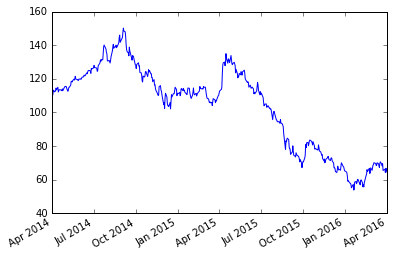

In [26]:
plt.plot(date_label, input_data[:, 0])
plt.gcf().autofmt_xdate()

If we take all of actions into consideration, action space has huge dimention. So, I will just think about short, call, and hold for 'PTR' as all actions.

In [314]:
class DQNMLP(object):
    def __init__(self, n_stock, hidden_layers, n_actions, activation=tf.sigmoid,  
                           trade_stock_idx=0, n_batch=32,
                           gam=0.99, n_history=4, is_initialize=True):
        """initialized approximate value function
        
        Args:
            layers(list): list of the number of nodes in each layer
                last layer should be 3 because actions will be sell(-1), hold(0), buy(1)
            trade_stock_idx(int): trading stock index
            gam (float): discount factor
            n_history(int): nubmer of history that will be used as input
            n_batch (int): batch size
            freq_target_update (int): frequency of update for target network
            is_intialized(optional) (bool): if True, the graph will be initialized
        """
        print ("building model....")
        self.n_stock = n_stock
        self.hidden_layers = hidden_layers
        self.n_actions = n_actions
        self.activation = activation
        self.gam = gam
        self.n_history = n_history
        self.n_batch = n_batch
        self.trade_stock_idx = trade_stock_idx
        
        # intialize graph to avoid conflications
        if is_initialize is True:
            sess  = tf.InteractiveSession()
            tf.reset_default_graph()
            sess.close()
        
        self._stock_data = tf.placeholder(tf.float32, [self.n_batch, n_history, n_stock], name= "stock_data")
        # the amount of stocks player holds
        self._stock_hold = tf.placeholder(tf.float32, [self.n_batch], name="stock_hold")
        
        # change format for training
        stock_data_tilde = tf.reshape(self._stock_data, [self.n_batch, n_history * n_stock])
        stock_hold_tilde = tf.reshape(self._stock_hold, [self.n_batch, 1])
        self._input = tf.concat(1, [stock_data_tilde, stock_hold_tilde], name="input")
        self._target = tf.placeholder(tf.float32, [self.n_batch], name="target")
        
        # normalization for input
        n_layer0 = n_history * n_stock + 1
        shape = [n_layer0]
        gamma = tf.Variable(tf.constant(1.0, shape=shape), name="gamma")
        beta = tf.Variable(tf.constant(0.0, shape=shape), name="beta")
        self.normalized_input = self.batch_normalization(self._input, gamma=gamma, beta=beta)
                
        # keep parameters for pretraining
        self.gamma_list = []
        self.beta_list = []
        self.gamma_list.append(gamma)
        self.beta_list.append(beta)
        
        # parameters
        self.W_list = []
        self.b_list = []
        
        # the name of variable scope will be layer0, layer1, ...
        self.x_list = []
        x = self.normalized_input
        self.x_list.append(x)
        n_in = n_layer0
        for i_layer in xrange(len(hidden_layers)):
            with tf.variable_scope("hidden_layer%d" % i_layer):
                n_out = hidden_layers[i_layer]
                W = self.weight_variable([n_in, n_out])
                b = self.bias_variable([n_out])
                n_in = n_out
                
                # keep parameters for pretraining
                self.W_list.append(W)
                self.b_list.append(b)
                
                z = tf.matmul(x, W) + b
      
                shape = [n_out]
                gamma = tf.Variable(tf.constant(1.0, shape=shape), name="gamma")
                beta = tf.Variable(tf.constant(0.0, shape=shape), name="beta")
                
                # keep parameters for pretraining
                self.gamma_list.append(gamma)
                self.beta_list.append(beta)
                
                normalized_z = self.batch_normalization(z, shape, gamma, beta)
                x = self.activation(normalized_z)
                self.x_list.append(x)
        # each node should be corresponding to each action
        n_out = n_actions
        W = self.weight_variable([n_in, n_out])
        b = self.bias_variable([n_out])
                
        # keep parameters for pretraining
        self.W_list.append(W)
        self.b_list.append(b)
        self.output = tf.matmul(x, W) + b
        
        # choose action for evaluation
        self._action = tf.placeholder(tf.int32, [self.n_batch], name="action")
        # index of actions should be 2: buy, 1: hold, 0: sell
        action_idx = self._action + 1
        self.Q = tf.pack([tf.gather(self.output[i, :], action_idx[i]) for i in xrange(n_batch)])
        
        # make graph for target
        self.opt_Q = tf.reduce_max(self.output, reduction_indices=1, name="opt_Q")
        self.non_opt_Q = -tf.reduce_max(-self.output, reduction_indices=1)
        self.opt_action = tf.argmax(self.output, 1, name='opt_action')
        current_price = self._stock_data[:, n_history - 1, trade_stock_idx]
        hist_price = self._stock_data[:, n_history - 2, trade_stock_idx]
        self.reward = (current_price - hist_price) * tf.to_float(self._stock_hold)
        target_nonend = self.reward + gam * self.opt_Q
        # if eposde end end index will be 1 and we recieve only reward as Q- value
        self._end_idx = tf.placeholder(tf.int32, [self.n_batch], name="end_idx")
        self.target_val = tf.pack([tf.gather(tf.pack([target_nonend, self.reward])[:, i], self._end_idx[i]) for i in xrange(self.n_batch)])
        
        
        # training graph
        self._learning_rate = tf.placeholder(tf.float32, shape=[], name="learning_rate")
        self.loss = tf.reduce_mean(tf.square(self.Q - self._target))
        # fixate on using this optimizer, otherwize, otherwise endup using unecessary graph nose
        self.optimizer = tf.train.AdamOptimizer(self._learning_rate, name="Optimizer")
        self.train = self.optimizer.minimize(self.loss)
        
        # build nonbatch graph
        self._data_nonbatch = tf.placeholder(tf.float32, [self.n_history, self.n_stock], name= "nonbatch_stock_data")
        # the amount of stocks player holds
        self._hold_nonbatch = tf.placeholder(tf.float32, [1], name="nonbatch_hold_stock")
        
        # change format for training
        data_tilde = tf.reshape(self._data_nonbatch, [1, n_history * n_stock])
        hold_tilde = tf.reshape(self._hold_nonbatch, [1, 1])
        self._input_nonbatch = tf.concat(1, [data_tilde, hold_tilde], name="nonbatch_input")
        self._target_nonbatch = tf.placeholder(tf.float32, name="nonbatch_target")
        
        # normalization for input
        normalized_input = self.batch_normalization(self._input_nonbatch, gamma=self.gamma_list[0], beta=self.beta_list[0])
        
        # the name of variable scope will be layer0, layer1, ...
        x = normalized_input
        for i_layer in xrange(len(hidden_layers)):
            with tf.variable_scope("hidden_layer%d" % i_layer):
                z = tf.matmul(x, self.W_list[i_layer]) + self.b_list[i_layer]
                normalized_z = self.batch_normalization(z, gamma=self.gamma_list[i_layer + 1], beta=self.beta_list[i_layer + 1])
                x = self.activation(normalized_z)
        self.output_nonbatch = tf.matmul(x, self.W_list[-1]) + self.b_list[-1]
        
    def weight_variable(self, shape):
        initial = tf.truncated_normal(shape, stddev=1.0)
        return tf.Variable(initial, name="weight")
        
    def bias_variable(self, shape):
        initial = tf.constant(0.0, shape=shape)
        return tf.Variable(initial, name="bias")
        
    def batch_normalization(self, input_data, shape=None, gamma=None, beta=None):
        # input should be hidden_dim
        eps = 1e-5
        if gamma is None:
            gamma = tf.Variable(tf.constant(1.0, shape=shape))
        if beta is None:
            beta = tf.Variable(tf.constant(0.0, shape=shape))
        mean, variance = tf.nn.moments(input_data, [0])
        return gamma * (input_data - mean) / tf.sqrt(variance + eps) + beta
    
    def eps_greedy(self, eps, stock_hold, stock_data, sess):
        """Return action chosen by greedy algorithm"""
        u = np.random.uniform()
        q_value = self.output_nonbatch.eval(session=sess, 
                                                       feed_dict={self._hold_nonbatch: [stock_hold],
                                                                            self._data_nonbatch: stock_data})[0]
        if u < 1 - eps:
            action = np.argmax(q_value) - 1
        else:
            action = np.random.randint(0, self.n_actions) - 1
        
        return action
                
    
    def training(self, stock_data, init_cash=1000, init_stock=0, 
                         init_eps=1.0, decay_eps=0.99, min_eps=0.1, 
                         learning_rate=1e-4, n_memory=1000, n_epochs=100):
        """training DQN which consider three actions; sell, buy, hold
              money and n_stock are considered as state variable
        
        Args:
            data (list): stock price for one company
            n_memory (int): the number of data that is used for Experience Replay
            eps (float): the epsilon of greedy epsilon used for behavior policy
            init_cash (float): initial available cash
            init_stock (int): the number of stock data 
        """
        init_op = tf.initialize_all_variables()
        saver = tf.train.Saver()
        T = len(stock_data)
        print_freq = int(n_epochs / 10)
        
        print ("training....")
        st = time.time()
        with tf.Session() as sess:
            sess.run(init_op)
            value_list  = []
            eps = init_eps
            for epoch in xrange(n_epochs):
                lr = learning_rate
                stock = init_stock
                cash = init_cash
                # memory pool used for Experience Replay
                # length should be less than n_memory
                action_memory = []
                stock_data_memory = []
                stock_hold_memory = []
                new_sd_memory = []
                new_sh_memory = []
                end_idx_memory = []
                for t in xrange(self.n_history, T):
                    # select action with e-greedy for replay memory
                    # buy:+1, hold: 0, sell -1
                    stock_price = stock_data[t - self.n_history:t]
                    action= self.eps_greedy(eps, stock, stock_price, sess)
                    new_stock = stock + action
                    cash -= action * stock_data[t - 1][self.trade_stock_idx]
                    new_stock_price = stock_data[t - self.n_history + 1:t + 1]
                    if t == T - 1:
                        end_idx = 1
                    else:
                        end_idx = 0
                    # reward = new_stock * (new_stock_price[-1] - stock_price[-1])
                    # add memory pools whose capacity is up to n_memory
                    if len(action_memory) == n_memory:
                        del action_memory[0]
                        # del reward_memory[0]
                        del stock_data_memory[0]
                        del stock_hold_memory[0]
                        del new_sd_memory[0]
                        del new_sh_memory[0]
                        del end_idx_memory[0]
                    action_memory.append(action)
                    # reward_memory.append(reward)
                    stock_data_memory.append(stock_price)
                    stock_hold_memory.append(stock)
                    new_sd_memory.append(new_stock_price)
                    new_sh_memory.append(new_stock)
                    end_idx_memory.append(end_idx)
                    
                    # renew variable
                    stock = new_stock
                    
                    # select transition from pool
                    idx = np.random.randint(0, len(action_memory), self.n_batch)
                    action_batch = [action_memory[i] for i in idx]
                    # reward_batch = [reward_memory[i] for i in idx]
                    data_batch = [stock_data_memory[i] for i in idx]
                    hold_batch = [stock_hold_memory[i] for i in idx]
                    new_data_batch = [new_sd_memory[i] for i in idx]
                    new_hold_batch = [new_sh_memory[i] for i in idx]
                    end_idx_batch = [end_idx_memory[i] for i in idx]

                    target = self.target_val.eval(session=sess, 
                                                                      feed_dict={self._stock_hold: new_hold_batch,
                                                                                           self._stock_data: new_data_batch,
                                                                                           self._action: action_batch,
                                                                                           self._end_idx: end_idx_batch})
                    
                    sess.run(self.train, 
                                    feed_dict={self._action: action_batch, 
                                                         self._stock_data: data_batch,
                                                         self._stock_hold: hold_batch,
                                                         self._target: target,
                                                         self._learning_rate: lr})  
                    
                value = cash + stock_data[-1, self.trade_stock_idx] * stock
                value_list.append(value)
                
                if epoch % print_freq == 0:
                    print ("epoch: %d, final value:%f, stock:%d, cash:%f, eps:%f" % (epoch, value, stock, cash, eps))
                    print ("elapsed time", time.time() - st)
                    
                if eps > min_eps:
                    eps *= decay_eps
                    
            save_path = saver.save(sess, "/jupyter/tomoaki/DQN/trained_params.ckpt")
            print("Model saved in file: %s" % save_path)
            print ("elapsed time: ", time.time() - st)
           
        return value_list

In [315]:
test_idx = date_label.index(datetime.datetime(2015, 4, 1, 0, 0))
trade_data = input_data[:, 0]
n_history = 4
n_stock = len(input_data[0])
n_in = n_history * n_stock + 1
n_hid1 = int(n_in * 0.5)
n_hid2 = int(n_hid1 * 0.5)
n_hid3 = int(n_hid1 * 0.5)
n_actions=3
hidden_layers = [n_hid1, n_hid2,n_hid3]
train = input_data[:test_idx]
test = input_data[test_idx:]
date_test = date_label[test_idx:]

dqn = DQNMLP(n_stock, hidden_layers, n_actions, trade_stock_idx=0, activation=tf.nn.relu)
print ("start!")
value, actions = dqn.training(stock_data=input_data, n_epochs=100, init_cash=1000, decay_eps=0.9)

building model....
start!
training....
epoch: 0, final value:449.660017, stock:-27, cash:3423.169936, eps:1.000000
elapsed time 8.38797903061
epoch: 10, final value:1867.189151, stock:293, cash:-30400.899970, eps:0.348678
elapsed time 80.5270540714
epoch: 20, final value:3985.058699, stock:441, cash:-44582.269978, eps:0.121577
elapsed time 152.578467131
epoch: 30, final value:3557.958702, stock:452, cash:-46220.799942, eps:0.098477
elapsed time 224.922804117
epoch: 40, final value:3823.428627, stock:463, cash:-47166.759984, eps:0.098477
elapsed time 297.402444124
epoch: 50, final value:3989.018684, stock:441, cash:-44578.309993, eps:0.098477
elapsed time 369.57933116
epoch: 60, final value:3708.798698, stock:448, cash:-45629.439958, eps:0.098477
elapsed time 441.848047972
epoch: 70, final value:3761.368696, stock:444, cash:-45136.349972, eps:0.098477
elapsed time 514.023322105
epoch: 80, final value:3971.708662, stock:455, cash:-46137.439973, eps:0.098477
elapsed time 586.130031109
epo

In [316]:
def monkey_action(cash, stock, action_price):
    """sell, buy and hold will be executed at randome as if it was traded by a monkey"""
    # buy:+1, hold: 0, sell -1
    # we are not allowed to excute short selling
    if action_price <= cash and stock == 0:
        actions = [0, 1]
    elif action_price > cash and stock > 0:
        actions = [-1, 0]
    elif action_price > cash and stock == 0:
        actions = [0]
    else:
        actions = [-1, 0, 1]        
    action = actions[np.random.randint(0, len(actions))]
    return np.int32(action)

def monkey_trade(trade_stock,cash=10000, stock=0):
    for price in iter(trade_stock):
        action = monkey_action(cash, stock, price)
        stock += action
        cash -= action * price
    value = cash + trade_stock[-1] * stock
    return value

In [317]:
value_monkey = []
n_epoch = 100
for i in range(n_epoch):
    value_monkey.append(monkey_trade(trade_data, cash=1000, stock=0))

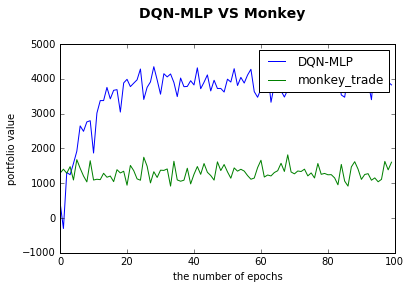

In [318]:
fig = plt.figure()
fig.suptitle('DQN-MLP VS Monkey', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
# ax.set_title('axes title')

ax.set_xlabel('the number of epochs')
ax.set_ylabel('portfolio value')

plt.plot(value, label="DQN-MLP")
plt.plot(value_monkey, label="monkey_trade")
plt.legend()
plt.savefig("DQN_MLP_VS_Monkey.png")

In [351]:
class DQNMLP2(object):
    def __init__(self, n_stock, hidden_layers, n_actions, activation=tf.nn.relu,  
                           trade_stock_idx=0, n_batch=32,
                           gam=0.99, n_history=4, is_initialize=True):
        """initialized approximate value function
        
        Args:
            layers(list): list of the number of nodes in each layer
                last layer should be 3 because actions will be sell(-1), hold(0), buy(1)
            trade_stock_idx(int): trading stock index
            gam (float): discount factor
            n_history(int): nubmer of history that will be used as input
            n_batch (int): batch size
            freq_target_update (int): frequency of update for target network
            is_intialized(optional) (bool): if True, the graph will be initialized
        """
        print ("building model....")
        self.n_stock = n_stock
        self.hidden_layers = hidden_layers
        self.n_actions = n_actions
        self.activation = activation
        self.gam = gam
        self.n_history = n_history
        self.n_batch = n_batch
        self.trade_stock_idx = trade_stock_idx
        
        # intialize graph to avoid conflications
        if is_initialize is True:
            sess  = tf.InteractiveSession()
            tf.reset_default_graph()
            sess.close()
        
        self._stock_data = tf.placeholder(tf.float32, [self.n_batch, n_history, n_stock], name= "stock_data")
        # the amount of stocks player holds
        self._stock_hold = tf.placeholder(tf.float32, [self.n_batch], name="stock_hold")
        
        # change format for training
        stock_data_tilde = tf.reshape(self._stock_data, [self.n_batch, n_history * n_stock])
        stock_hold_tilde = tf.reshape(self._stock_hold, [self.n_batch, 1])
        self._input = tf.concat(1, [stock_data_tilde, stock_hold_tilde], name="input")
        self._target = tf.placeholder(tf.float32, [self.n_batch], name="target")
        
        # normalization for input
        n_layer0 = n_history * n_stock + 1
        shape = [n_layer0]
        gamma = tf.Variable(tf.constant(1.0, shape=shape), name="gamma")
        beta = tf.Variable(tf.constant(0.0, shape=shape), name="beta")
        self.normalized_input = self.batch_normalization(self._input, gamma=gamma, beta=beta)
                
        # keep parameters for pretraining
        self.gamma_list = []
        self.beta_list = []
        self.gamma_list.append(gamma)
        self.beta_list.append(beta)
        
        # parameters
        self.W_list = []
        self.b_list = []
        
        # the name of variable scope will be layer0, layer1, ...
        self.x_list = []
        x = self.normalized_input
        self.x_list.append(x)
        n_in = n_layer0
        for i_layer in xrange(len(hidden_layers)):
            with tf.variable_scope("hidden_layer%d" % i_layer):
                n_out = hidden_layers[i_layer]
                W = self.weight_variable([n_in, n_out])
                b = self.bias_variable([n_out])
                n_in = n_out
                
                # keep parameters for pretraining
                self.W_list.append(W)
                self.b_list.append(b)
                
                z = tf.matmul(x, W) + b
      
                shape = [n_out]
                gamma = tf.Variable(tf.constant(1.0, shape=shape), name="gamma")
                beta = tf.Variable(tf.constant(0.0, shape=shape), name="beta")
                
                # keep parameters for pretraining
                self.gamma_list.append(gamma)
                self.beta_list.append(beta)
                
                normalized_z = self.batch_normalization(z, shape, gamma, beta)
                x = self.activation(normalized_z)
                self.x_list.append(x)
        # each node should be corresponding to each action
        n_out = n_actions
        W = self.weight_variable([n_in, n_out])
        b = self.bias_variable([n_out])
                
        # keep parameters for pretraining
        self.W_list.append(W)
        self.b_list.append(b)
        self.output = tf.matmul(x, W) + b
        
        # choose action for evaluation
        self._action = tf.placeholder(tf.int32, [self.n_batch], name="action")
        # index of actions should be 2: buy, 1: hold, 0: sell
        action_idx = self._action + 1
        self.Q = tf.pack([tf.gather(self.output[i, :], action_idx[i]) for i in xrange(n_batch)])
        
        # make graph for target
        self.opt_Q = tf.reduce_max(self.output, reduction_indices=1, name="opt_Q")
        self.non_opt_Q = -tf.reduce_max(-self.output, reduction_indices=1)
        self.opt_action = tf.argmax(self.output, 1, name='opt_action')
        current_price = self._stock_data[:, n_history - 1, trade_stock_idx]
        hist_price = self._stock_data[:, n_history - 2, trade_stock_idx]
        self.reward = (current_price - hist_price) * tf.to_float(self._action)
        target_nonend = self.reward + gam * self.opt_Q
        # if eposde end end index will be 1 and we recieve only reward as Q- value
        self._end_idx = tf.placeholder(tf.int32, [self.n_batch], name="end_idx")
        self.target_val = tf.pack([tf.gather(tf.pack([target_nonend, self.reward])[:, i], self._end_idx[i]) for i in xrange(self.n_batch)])
        
        
        # training graph
        self._learning_rate = tf.placeholder(tf.float32, shape=[], name="learning_rate")
        self.loss = tf.reduce_mean(tf.square(self.Q - self._target))
        # fixate on using this optimizer, otherwize, otherwise endup using unecessary graph nose
        self.optimizer = tf.train.AdamOptimizer(self._learning_rate, name="Optimizer")
        self.train = self.optimizer.minimize(self.loss)
        
        # build nonbatch graph
        self._data_nonbatch = tf.placeholder(tf.float32, [self.n_history, self.n_stock], name= "nonbatch_stock_data")
        # the amount of stocks player holds
        self._hold_nonbatch = tf.placeholder(tf.float32, [1], name="nonbatch_hold_stock")
        
        # change format for training
        data_tilde = tf.reshape(self._data_nonbatch, [1, n_history * n_stock])
        hold_tilde = tf.reshape(self._hold_nonbatch, [1, 1])
        self._input_nonbatch = tf.concat(1, [data_tilde, hold_tilde], name="nonbatch_input")
        self._target_nonbatch = tf.placeholder(tf.float32, name="nonbatch_target")
        
        # normalization for input
        normalized_input = self.batch_normalization(self._input_nonbatch, gamma=self.gamma_list[0], beta=self.beta_list[0])
        
        # the name of variable scope will be layer0, layer1, ...
        x = normalized_input
        for i_layer in xrange(len(hidden_layers)):
            with tf.variable_scope("hidden_layer%d" % i_layer):
                z = tf.matmul(x, self.W_list[i_layer]) + self.b_list[i_layer]
                normalized_z = self.batch_normalization(z, gamma=self.gamma_list[i_layer + 1], beta=self.beta_list[i_layer + 1])
                x = self.activation(normalized_z)
        self.output_nonbatch = tf.matmul(x, self.W_list[-1]) + self.b_list[-1]
        
    def weight_variable(self, shape):
        initial = tf.truncated_normal(shape, stddev=1.0)
        return tf.Variable(initial, name="weight")
        
    def bias_variable(self, shape):
        initial = tf.constant(0.0, shape=shape)
        return tf.Variable(initial, name="bias")
        
    def batch_normalization(self, input_data, shape=None, gamma=None, beta=None):
        # input should be hidden_dim
        eps = 1e-5
        if gamma is None:
            gamma = tf.Variable(tf.constant(1.0, shape=shape))
        if beta is None:
            beta = tf.Variable(tf.constant(0.0, shape=shape))
        mean, variance = tf.nn.moments(input_data, [0])
        return gamma * (input_data - mean) / tf.sqrt(variance + eps) + beta
    
    def eps_greedy(self, eps, stock_hold, stock_data, sess):
        """Return action chosen by greedy algorithm"""
        u = np.random.uniform()
        q_value = self.output_nonbatch.eval(session=sess, 
                                                       feed_dict={self._hold_nonbatch: [stock_hold],
                                                                            self._data_nonbatch: stock_data})[0]
        if u < 1 - eps:
            action = np.argmax(q_value) - 1
        else:
            action = np.random.randint(0, self.n_actions) - 1
        
        return action
                
    
    def training(self, stock_data, init_cash=1000, init_stock=0, 
                         init_eps=1.0, decay_eps=0.99, min_eps=0.1, 
                         learning_rate=1e-4, n_memory=1000, n_epochs=100):
        """training DQN which consider three actions; sell, buy, hold
              money and n_stock are considered as state variable
        
        Args:
            data (list): stock price for one company
            n_memory (int): the number of data that is used for Experience Replay
            eps (float): the epsilon of greedy epsilon used for behavior policy
            init_cash (float): initial available cash
            init_stock (int): the number of stock data 
        """
        init_op = tf.initialize_all_variables()
        saver = tf.train.Saver()
        T = len(stock_data)
        print_freq = int(n_epochs / 10)
        if print_freq == 0:
            print_freq = 1
        
        print ("training....")
        st = time.time()
        with tf.Session() as sess:
            sess.run(init_op)
            value_list  = []
            eps = init_eps
            for epoch in xrange(n_epochs):
                lr = learning_rate
                stock = init_stock
                cash = init_cash
                # memory pool used for Experience Replay
                # length should be less than n_memory
                action_memory = []
                stock_data_memory = []
                stock_hold_memory = []
                new_sd_memory = []
                new_sh_memory = []
                end_idx_memory = []
                for t in xrange(self.n_history, T):
                    # select action with e-greedy for replay memory
                    # buy:+1, hold: 0, sell -1
                    stock_price = stock_data[t - self.n_history:t]
                    action= self.eps_greedy(eps, stock, stock_price, sess)
                    new_stock = stock + action
                    cash -= action * stock_data[t - 1][self.trade_stock_idx]
                    new_stock_price = stock_data[t - self.n_history + 1:t + 1]
                    if t == T - 1:
                        end_idx = 1
                    else:
                        end_idx = 0
                    # reward = new_stock * (new_stock_price[-1] - stock_price[-1])
                    # add memory pools whose capacity is up to n_memory
                    if len(action_memory) == n_memory:
                        del action_memory[0]
                        # del reward_memory[0]
                        del stock_data_memory[0]
                        del stock_hold_memory[0]
                        del new_sd_memory[0]
                        del new_sh_memory[0]
                        del end_idx_memory[0]
                    action_memory.append(action)
                    # reward_memory.append(reward)
                    stock_data_memory.append(stock_price)
                    stock_hold_memory.append(stock)
                    new_sd_memory.append(new_stock_price)
                    new_sh_memory.append(new_stock)
                    end_idx_memory.append(end_idx)
                    
                    # renew variable
                    stock = new_stock
                    
                    # select transition from pool
                    idx = np.random.randint(0, len(action_memory), self.n_batch)
                    action_batch = [action_memory[i] for i in idx]
                    # reward_batch = [reward_memory[i] for i in idx]
                    data_batch = [stock_data_memory[i] for i in idx]
                    hold_batch = [stock_hold_memory[i] for i in idx]
                    new_data_batch = [new_sd_memory[i] for i in idx]
                    new_hold_batch = [new_sh_memory[i] for i in idx]
                    end_idx_batch = [end_idx_memory[i] for i in idx]

                    target = self.target_val.eval(session=sess, 
                                                                      feed_dict={self._stock_hold: new_hold_batch,
                                                                                           self._stock_data: new_data_batch,
                                                                                           self._action: action_batch,
                                                                                           self._end_idx: end_idx_batch})
                    
                    sess.run(self.train, 
                                    feed_dict={self._action: action_batch, 
                                                         self._stock_data: data_batch,
                                                         self._stock_hold: hold_batch,
                                                         self._target: target,
                                                         self._learning_rate: lr})  
                    
                value = cash + stock_data[-1, self.trade_stock_idx] * stock
                value_list.append(value)
                
                if epoch % print_freq == 0:
                    print ("epoch: %d, final value:%f, stock:%d, cash:%f, eps:%f" % (epoch, value, stock, cash, eps))
                    print ("elapsed time", time.time() - st)    
                
                eps *= decay_eps
                if eps <= min_eps:
                    eps = min_eps
                    
            # analize which timing sell and buy are executed
            # assumed that in the first n_history we do nothing
            actions = [0]  * self.n_history
            for t in xrange(self.n_history, T):
                # select action with e-greedy for replay memory
                # buy:+1, hold: 0, sell -1
                stock_price = stock_data[t - self.n_history:t]
                stock_hold = 0
                q_value = self.output_nonbatch.eval(session=sess,
                                                                                 feed_dict={self._data_nonbatch: stock_price,
                                                                                                      self._hold_nonbatch: [stock_hold]})
                max_action = np.argmax(q_value) - 1
                stock_hold += max_action
                actions.append(max_action)
            
            save_path = saver.save(sess, "/jupyter/tomoaki/DQN/trained_params.ckpt")
            print("Model saved in file: %s" % save_path)
            print ("elapsed time: ", time.time() - st)
           
        return value_list, actions

In [352]:
test_idx = date_label.index(datetime.datetime(2015, 4, 1, 0, 0))
trade_data = input_data[:, 0]
n_history = 4
n_stock = len(input_data[0])
n_in = n_history * n_stock + 1
n_hid1 = int(n_in * 0.5)
n_hid2 = int(n_hid1 * 0.5)
n_hid3 = int(n_hid1 * 0.5)
n_actions=3
hidden_layers = [n_hid1, n_hid2,n_hid3]
train = input_data[:test_idx]
test = input_data[test_idx:]
date_test = date_label[test_idx:]

dqn = DQNMLP2(n_stock, hidden_layers, n_actions, trade_stock_idx=0)
print ("start!")
value, actions = dqn.training(stock_data=input_data, n_epochs=50, init_cash=1000, decay_eps=0.9)

building model....
start!
training....
epoch: 0, final value:97.269936, stock:24, cash:-2545.849992, eps:1.000000
elapsed time 8.10980296135
epoch: 5, final value:2130.149496, stock:171, cash:-16702.079991, eps:0.590490
elapsed time 44.4888248444
epoch: 10, final value:2694.679102, stock:314, cash:-31886.139956, eps:0.348678
elapsed time 80.3815488815
epoch: 15, final value:3596.198787, stock:408, cash:-41336.839989, eps:0.205891
elapsed time 116.257081032
epoch: 20, final value:3833.538709, stock:433, cash:-43852.749992, eps:0.121577
elapsed time 152.205183029
epoch: 25, final value:4020.498739, stock:445, cash:-44987.349926, eps:0.100000
elapsed time 188.14924407
epoch: 30, final value:3878.488670, stock:453, cash:-46010.399971, eps:0.100000
elapsed time 223.867195845
epoch: 35, final value:3435.318727, stock:438, cash:-44801.619959, eps:0.100000
elapsed time 259.785681009
epoch: 40, final value:3997.128726, stock:445, cash:-45010.719939, eps:0.100000
elapsed time 295.657281876
epoch

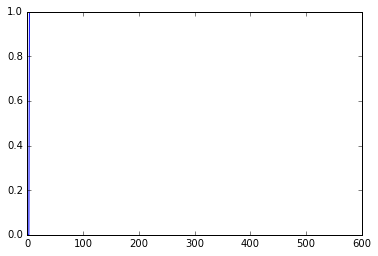

In [353]:
plt.plot(actions)

In [338]:
def monkey_action2(cash, stock, action_price):
    """sell, buy and hold will be executed at randome as if it was traded by a monkey"""
    # buy:+1, hold: 0, sell -1
    # we are not allowed to excute short selling
    actions = [1]        
    action = actions[np.random.randint(0, len(actions))]
    return np.int32(action)

def monkey_trade2(trade_stock,cash=10000, stock=0):
    for price in iter(trade_stock):
        action = monkey_action2(cash, stock, price)
        stock += action
        cash -= action * price
    value = cash + trade_stock[-1] * stock
    return value

In [348]:
trade_data = input_data[:, 3]
value_monkey = []
n_epoch = 100
for i in range(n_epoch):
    value_monkey.append(monkey_trade2(trade_data, cash=1000, stock=0))

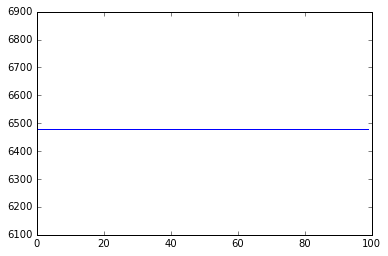

In [349]:
plt.plot(value_monkey)

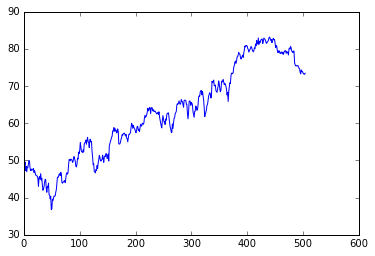

In [350]:
plt.plot(trade_data)

As you see in the graph, stock data we are using have increasing trend. So once we recieve whole data for trading as we've been doing, optimal actions wil be just keep buying.

Especially, in our case, we need to do this taks in online fashion.

In [378]:
class onlineDQNMLP(object):
    def __init__(self, n_stock, hidden_layers, n_actions, activation=tf.nn.relu,  
                           trade_stock_idx=0, n_batch=32,
                           gam=0.99, n_history=4, is_initialize=True):
        """initialized approximate value function
        
        Args:
            layers(list): list of the number of nodes in each layer
                last layer should be 3 because actions will be sell(-1), hold(0), buy(1)
            trade_stock_idx(int): trading stock index
            gam (float): discount factor
            n_history(int): nubmer of history that will be used as input
            n_batch (int): batch size
            freq_target_update (int): frequency of update for target network
            is_intialized(optional) (bool): if True, the graph will be initialized
        """
        print ("building model....")
        self.n_stock = n_stock
        self.hidden_layers = hidden_layers
        self.n_actions = n_actions
        self.activation = activation
        self.gam = gam
        self.n_history = n_history
        self.n_batch = n_batch
        self.trade_stock_idx = trade_stock_idx
        
        # intialize graph to avoid conflications
        if is_initialize is True:
            sess  = tf.InteractiveSession()
            tf.reset_default_graph()
            sess.close()
        
        self._stock_data = tf.placeholder(tf.float32, [self.n_batch, n_history, n_stock], name= "stock_data")
        # the amount of stocks player holds
        self._stock_hold = tf.placeholder(tf.float32, [self.n_batch], name="stock_hold")
        
        # change format for training
        stock_data_tilde = tf.reshape(self._stock_data, [self.n_batch, n_history * n_stock])
        stock_hold_tilde = tf.reshape(self._stock_hold, [self.n_batch, 1])
        self._input = tf.concat(1, [stock_data_tilde, stock_hold_tilde], name="input")
        self._target = tf.placeholder(tf.float32, [self.n_batch], name="target")
        
        # normalization for input
        n_layer0 = n_history * n_stock + 1
        shape = [n_layer0]
        gamma = tf.Variable(tf.constant(1.0, shape=shape), name="gamma")
        beta = tf.Variable(tf.constant(0.0, shape=shape), name="beta")
        self.normalized_input = self.batch_normalization(self._input, gamma=gamma, beta=beta)
                
        # keep parameters for pretraining
        self.gamma_list = []
        self.beta_list = []
        self.gamma_list.append(gamma)
        self.beta_list.append(beta)
        
        # parameters
        self.W_list = []
        self.b_list = []
        
        # the name of variable scope will be layer0, layer1, ...
        self.x_list = []
        x = self.normalized_input
        self.x_list.append(x)
        n_in = n_layer0
        for i_layer in xrange(len(hidden_layers)):
            with tf.variable_scope("hidden_layer%d" % i_layer):
                n_out = hidden_layers[i_layer]
                W = self.weight_variable([n_in, n_out])
                b = self.bias_variable([n_out])
                n_in = n_out
                
                # keep parameters for pretraining
                self.W_list.append(W)
                self.b_list.append(b)
                
                z = tf.matmul(x, W) + b
      
                shape = [n_out]
                gamma = tf.Variable(tf.constant(1.0, shape=shape), name="gamma")
                beta = tf.Variable(tf.constant(0.0, shape=shape), name="beta")
                
                # keep parameters for pretraining
                self.gamma_list.append(gamma)
                self.beta_list.append(beta)
                
                normalized_z = self.batch_normalization(z, shape, gamma, beta)
                x = self.activation(normalized_z)
                self.x_list.append(x)
        # each node should be corresponding to each action
        n_out = n_actions
        W = self.weight_variable([n_in, n_out])
        b = self.bias_variable([n_out])
                
        # keep parameters for pretraining
        self.W_list.append(W)
        self.b_list.append(b)
        self.output = tf.matmul(x, W) + b
        
        # choose action for evaluation
        self._action = tf.placeholder(tf.int32, [self.n_batch], name="action")
        # index of actions should be 2: buy, 1: hold, 0: sell
        action_idx = self._action + 1
        self.Q = tf.pack([tf.gather(self.output[i, :], action_idx[i]) for i in xrange(n_batch)])
        
        # make graph for target
        self.opt_Q = tf.reduce_max(self.output, reduction_indices=1, name="opt_Q")
        self.non_opt_Q = -tf.reduce_max(-self.output, reduction_indices=1)
        self.opt_action = tf.argmax(self.output, 1, name='opt_action')
        current_price = self._stock_data[:, n_history - 1, trade_stock_idx]
        hist_price = self._stock_data[:, n_history - 2, trade_stock_idx]
        self.reward = (current_price - hist_price) * tf.to_float(self._stock_hold)
        target_nonend = self.reward + gam * self.opt_Q
        # if eposde end end index will be 1 and we recieve only reward as Q- value
        self._end_idx = tf.placeholder(tf.int32, [self.n_batch], name="end_idx")
        self.target_val = tf.pack([tf.gather(tf.pack([target_nonend, self.reward])[:, i], self._end_idx[i]) for i in xrange(self.n_batch)])
        
        
        # training graph
        self._learning_rate = tf.placeholder(tf.float32, shape=[], name="learning_rate")
        self.loss = tf.reduce_mean(tf.square(self.Q - self._target))
        # fixate on using this optimizer, otherwize, otherwise endup using unecessary graph nose
        self.optimizer = tf.train.AdamOptimizer(self._learning_rate, name="Optimizer")
        self.train = self.optimizer.minimize(self.loss)
        
        # build nonbatch graph
        self._data_nonbatch = tf.placeholder(tf.float32, [self.n_history, self.n_stock], name= "nonbatch_stock_data")
        # the amount of stocks player holds
        self._hold_nonbatch = tf.placeholder(tf.float32, [1], name="nonbatch_hold_stock")
        
        # change format for training
        data_tilde = tf.reshape(self._data_nonbatch, [1, n_history * n_stock])
        hold_tilde = tf.reshape(self._hold_nonbatch, [1, 1])
        self._input_nonbatch = tf.concat(1, [data_tilde, hold_tilde], name="nonbatch_input")
        self._target_nonbatch = tf.placeholder(tf.float32, name="nonbatch_target")
        
        # normalization for input
        normalized_input = self.batch_normalization(self._input_nonbatch, gamma=self.gamma_list[0], beta=self.beta_list[0])
        
        # the name of variable scope will be layer0, layer1, ...
        x = normalized_input
        for i_layer in xrange(len(hidden_layers)):
            with tf.variable_scope("hidden_layer%d" % i_layer):
                z = tf.matmul(x, self.W_list[i_layer]) + self.b_list[i_layer]
                normalized_z = self.batch_normalization(z, gamma=self.gamma_list[i_layer + 1], beta=self.beta_list[i_layer + 1])
                x = self.activation(normalized_z)
        self.output_nonbatch = tf.matmul(x, self.W_list[-1]) + self.b_list[-1]
        
    def weight_variable(self, shape):
        initial = tf.truncated_normal(shape, stddev=1.0)
        return tf.Variable(initial, name="weight")
        
    def bias_variable(self, shape):
        initial = tf.constant(0.0, shape=shape)
        return tf.Variable(initial, name="bias")
        
    def batch_normalization(self, input_data, shape=None, gamma=None, beta=None):
        # input should be hidden_dim
        eps = 1e-5
        if gamma is None:
            gamma = tf.Variable(tf.constant(1.0, shape=shape))
        if beta is None:
            beta = tf.Variable(tf.constant(0.0, shape=shape))
        mean, variance = tf.nn.moments(input_data, [0])
        return gamma * (input_data - mean) / tf.sqrt(variance + eps) + beta
    
    def eps_greedy(self, eps, stock_hold, stock_data, sess):
        """Return action chosen by greedy algorithm"""
        u = np.random.uniform()
        q_value = self.output_nonbatch.eval(session=sess, 
                                                       feed_dict={self._hold_nonbatch: [stock_hold],
                                                                            self._data_nonbatch: stock_data})[0]
        if u < 1 - eps:
            action = np.argmax(q_value) - 1
        else:
            action = np.random.randint(0, self.n_actions) - 1
        
        return action
                
    
    def training(self, stock_data, init_cash=1000, init_stock=0, 
                         init_eps=1.0, decay_eps=0.99, min_eps=0.1, 
                         learning_rate=1e-4, n_memory=1000, n_epochs=100):
        """training DQN which consider three actions; sell, buy, hold
              money and n_stock are considered as state variable
        
        Args:
            data (list): stock price for one company
            n_memory (int): the number of data that is used for Experience Replay
            eps (float): the epsilon of greedy epsilon used for behavior policy
            init_cash (float): initial available cash
            init_stock (int): the number of stock data 
        """
        init_op = tf.initialize_all_variables()
        saver = tf.train.Saver()
        T = len(stock_data)
        print_freq = int(T / 10)
        if print_freq == 0:
            print_freq = 1
        
        print ("training....")
        st = time.time()
        with tf.Session() as sess:
            sess.run(init_op)
            value_list  = []
            eps = init_eps
            lr = learning_rate
            stock = init_stock
            cash = init_cash
            # analize which timing sell and buy are executed
            # assumed that in the first n_history we do nothing
            actions = [0]  * (self.n_history - 1)
            for t in xrange(self.n_history, T):
                # memory pool used for Experience Replay
                # length should be less than n_memory
                action_memory = []
                stock_data_memory = []
                stock_hold_memory = []
                new_sd_memory = []
                new_sh_memory = []
                end_idx_memory = []
                # select action with e-greedy for replay memory
                # buy:+1, hold: 0, sell -1
                stock_price = stock_data[t - self.n_history:t]
                action= self.eps_greedy(eps, stock, stock_price, sess)
                new_stock = stock + action
                cash -= action * stock_data[t - 1][self.trade_stock_idx]
                new_stock_price = stock_data[t - self.n_history + 1:t + 1]
                if t == T - 1:
                    end_idx = 1
                else:
                    end_idx = 0
                # reward = new_stock * (new_stock_price[-1] - stock_price[-1])
                # add memory pools whose capacity is up to n_memory
                if len(action_memory) == n_memory:
                    del action_memory[0]
                    # del reward_memory[0]
                    del stock_data_memory[0]
                    del stock_hold_memory[0]
                    del new_sd_memory[0]
                    del new_sh_memory[0]
                    del end_idx_memory[0]
                action_memory.append(action)
                # reward_memory.append(reward)
                stock_data_memory.append(stock_price)
                stock_hold_memory.append(stock)
                new_sd_memory.append(new_stock_price)
                new_sh_memory.append(new_stock)
                end_idx_memory.append(end_idx)
                
                # renew variable
                stock = new_stock
                
                for epoch in xrange(n_epochs):    
                    # select transition from pool
                    idx = np.random.randint(0, len(action_memory), self.n_batch)
                    action_batch = [action_memory[i] for i in idx]
                    # reward_batch = [reward_memory[i] for i in idx]
                    data_batch = [stock_data_memory[i] for i in idx]
                    hold_batch = [stock_hold_memory[i] for i in idx]
                    new_data_batch = [new_sd_memory[i] for i in idx]
                    new_hold_batch = [new_sh_memory[i] for i in idx]
                    end_idx_batch = [end_idx_memory[i] for i in idx]

                    target = self.target_val.eval(session=sess, 
                                                                      feed_dict={self._stock_hold: new_hold_batch,
                                                                                           self._stock_data: new_data_batch,
                                                                                           self._action: action_batch,
                                                                                           self._end_idx: end_idx_batch})
                    
                    sess.run(self.train, 
                                    feed_dict={self._action: action_batch, 
                                                         self._stock_data: data_batch,
                                                         self._stock_hold: hold_batch,
                                                         self._target: target,
                                                         self._learning_rate: lr})  
                    
                value = cash + stock_data[-1, self.trade_stock_idx] * stock
                value_list.append(value)
                
                # choose optimal action
                # buy:+1, hold: 0, sell -1
                q_value = self.output_nonbatch.eval(session=sess,
                                                                                 feed_dict={self._data_nonbatch: stock_price,
                                                                                                      self._hold_nonbatch: [stock]})
                max_action = np.argmax(q_value) - 1
                actions.append(max_action)
                
                if t % print_freq == 0:
                    print ("t: %d, current value:%f, stock:%d, cash:%f, eps:%f" % (t, value, stock, cash, eps))
                    print ("elapsed time", time.time() - st)    
                
                eps *= decay_eps
                if eps <= min_eps:
                    eps = min_eps
            
            save_path = saver.save(sess, "/jupyter/tomoaki/DQN/trained_params.ckpt")
            print("Model saved in file: %s" % save_path)
            print ("elapsed time: ", time.time() - st)
           
        return value_list, actions

In [379]:
test_idx = date_label.index(datetime.datetime(2015, 4, 1, 0, 0))
trade_data = input_data[:, 0]
n_history = 4
n_stock = len(input_data[0])
n_in = n_history * n_stock + 1
n_hid1 = int(n_in * 0.5)
n_hid2 = int(n_hid1 * 0.5)
n_hid3 = int(n_hid1 * 0.5)
n_actions=3
hidden_layers = [n_hid1, n_hid2,n_hid3]
train = input_data[:test_idx]
test = input_data[test_idx:]
date_test = date_label[test_idx:]
trade_stock_idx = 0

dqn = onlineDQNMLP(n_stock, hidden_layers, n_actions, trade_stock_idx=trade_stock_idx)
print ("start!")
value, actions = dqn.training(stock_data=input_data, n_epochs=10, init_cash=1000, decay_eps=0.9)

building model....
start!
training....
t: 50, current value:1999.109929, stock:21, cash:-313.620008, eps:0.100000
elapsed time 7.40280079842
t: 100, current value:3631.199805, stock:60, cash:-2976.600015, eps:0.100000
elapsed time 13.9452719688
t: 150, current value:5234.699646, stock:109, cash:-6769.470027, eps:0.100000
elapsed time 20.4554138184
t: 200, current value:5645.809510, stock:156, cash:-11534.470022, eps:0.100000
elapsed time 27.0043418407
t: 250, current value:5080.199374, stock:196, cash:-16505.280038, eps:0.100000
elapsed time 33.5279359818
t: 300, current value:5130.639450, stock:176, cash:-14252.240022, eps:0.100000
elapsed time 40.0834619999
t: 350, current value:5156.919604, stock:129, cash:-9049.850009, eps:0.100000
elapsed time 46.5672860146
t: 400, current value:5945.639740, stock:89, cash:-3855.929993, eps:0.100000
elapsed time 53.1190378666
t: 450, current value:7000.429836, stock:43, cash:2264.839965, eps:0.100000
elapsed time 59.6652548313
t: 500, current valu

In [388]:
date_label = date_label[::-1]

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


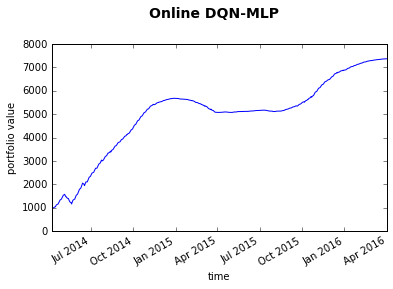

In [403]:
fig = plt.figure()
fig.suptitle('Online DQN-MLP', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
# ax.set_title('axes title')

ax.set_xlabel('time')
ax.set_ylabel('portfolio value')

n_data = len(value)
plt.plot(date_label[-n_data:], value)
plt.gcf().autofmt_xdate()
plt.legend()
plt.savefig("online_DQN.png")

In [408]:
actions_tilde = np.array(actions)
print(np.where(actions_tilde == 1))

(array([  7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18,  19,
        20,  21,  22,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,
        43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
        56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,
        69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,
        82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,
        95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107,
       108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120,
       121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133,
       134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146,
       147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159,
       160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172,
       173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185,
       186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 1

In [1]:
sell_idx = np.where(actions_tilde == -1)[0]
buy_idx = np.where(actions_tilde == 1)[0]
trade_data = input_data[:, trade_stock_idx]
sell_data = trade_data[sell_idx]
buy_data = trade_data[buy_idx]
n_data = len(trade_data)
n_zoom = int(0.5 * n_data)

fig = plt.figure()
fig.suptitle('sell timing', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
# ax.set_title('axes title')

ax.set_xlabel('time')
ax.set_ylabel('stock price of PTR')

plt.plot(trade_data, label="PTR")
plt.scatter(sell_idx, sell_data, label="sell")
# plt.scatter(buy_idx, buy_data, label="buy")
# plt.gcf().autofmt_xdate()
plt.xlim(250, 500)
plt.legend()
plt.savefig("sell_timing.png")

NameError: name 'np' is not defined

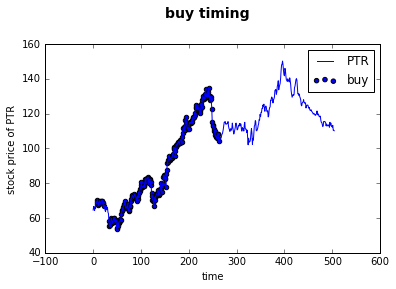

In [424]:
fig = plt.figure()
fig.suptitle('buy timing', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
# ax.set_title('axes title')

ax.set_xlabel('time')
ax.set_ylabel('stock price of PTR')

plt.plot(trade_data, label="PTR")
# plt.scatter(sell_idx, sell_data, label="sell")
plt.scatter(buy_idx, buy_data, label="buy")
# plt.gcf().autofmt_xdate()
plt.legend()
plt.savefig("buy_timing.png")

In [398]:
trade_stock_idx = 0

# DQN-CNN

As in original paper, I will implement DQN with CNN and compare performance with the DQNMLP

In [ ]:
class FullyConnected(object):
    def __init__(self, )

In [25]:
test_idx = date_label.index(datetime.datetime(2015, 4, 1, 0, 0))
trade_data = input_data[:, 0]
n_in = len(input_data[0]) + 3
n_hid1 = int(n_in * 0.5)
n_hid2 = int(n_hid1 * 0.5)
n_hid3 = int(n_hid1 * 0.5)
n_hid4 = int(n_hid1 * 0.5)
n_out = 1
layers = [n_in, n_hid1, n_hid2,n_hid3, n_hid4, n_out]

dqn = DQNMLP2(layers=layers, dev='/gpu:0')
print ("start!")
st = time.time()
value = dqn.training(whole_stock=input_data, trade_stock=trade_data, n_epochs=100, init_cash=1000)
elapsed = time.time() - st
print ("computation time:", elapsed)

building model....
start!
training....
epoch: 0, final value:-1843.918592, stock:-463, cash:49146.270019
elapsed time: 9.52894592285
epoch: 10, final value:-2088.178629, stock:-460, cash:48571.619991
elapsed time: 99.7569880486
epoch: 20, final value:-2119.028651, stock:-467, cash:49311.679948
elapsed time: 190.59383297
epoch: 30, final value:-1738.588669, stock:-454, cash:48260.429969
elapsed time: 282.201067924


KeyboardInterrupt: 